>src: https://mp.weixin.qq.com/s/PEhYrNbZyI9Prl3OwrBcAw
>author: 俊欣
>公众号: 关于数据分析与可视化


[](https://github.com/hidadeng/DaDengAndHisPython/blob/master/img/分销奖励.jpg)

/hidadeng/DaDengAndHisPython/blob/master/img/分销奖励.jpg?raw=true

今天分享几个不为人知的pandas函数，大家可能平时看到的不多，但是使用起来倒是非常的方便，也能够帮助我们数据分析人员大幅度地提高工作效率，同时也希望大家看完之后能够有所收获
- items()方法
- iterrows()方法
- insert()方法
- assign()方法
- eval()方法
- pop()方法
- truncate()方法
- count()方法
- add_prefix()方法/add_suffix()方法
- clip()方法
- filter()方法
- first()方法
- isin()方法
- df.plot.area()方法
- df.plot.bar()方法
- df.plot.box()方法
- df.plot.pie()方法

## items()方法
pandas当中的``items()``方法可以用来遍历数据集当中的每一列，同时返回列名以及每一列当中的内容，通过以元组的形式，示例如下

In [ ]:
import pandas as pd

df = pd.DataFrame({'species': ['bear', 'bear', 'marsupial'],
                   'population': [1864, 22000, 80000]},
                   index=['panda', 'polar', 'koala'])
df

|       | species   |   population |
|:------|:----------|-------------:|
| panda | bear      |         1864 |
| polar | bear      |        22000 |
| koala | marsupial |        80000 |

In [3]:
for label, content in df.items():
    print(f'label: {label}')
    print(f'content: {content}', sep='\n')
    print("=" * 50)

label: species
content: panda         bear
polar         bear
koala    marsupial
Name: species, dtype: object
label: population
content: panda     1864
polar    22000
koala    80000
Name: population, dtype: int64


相继的打印出了‘species’和‘population’这两列的列名和相应的内容


## iterrows()方法
而对于``iterrows()``方法而言，其功能则是遍历数据集当中的每一行，返回每一行的索引以及带有列名的每一行的内容，示例如下

In [5]:
for label, content in df.iterrows():
    print(f'label: {label}')
    print(f'content: {content}', sep='\n')
    print("=" * 50)

label: panda
content: species       bear
population    1864
Name: panda, dtype: object
label: polar
content: species        bear
population    22000
Name: polar, dtype: object
label: koala
content: species       marsupial
population        80000
Name: koala, dtype: object


## insert()方法
``insert()``方法主要是用于在数据集当中的特定位置处插入数据。在DataFrame数据集当中，列的索引也是从0开始的

示例如下

In [ ]:
#在第二列插入size字段，内容如下
df.insert(1, "size", [2000, 3000, 4000])
df

|       | species   |   size |   population |
|:------|:----------|-------:|-------------:|
| panda | bear      |   2000 |         1864 |
| polar | bear      |   3000 |        22000 |
| koala | marsupial |   4000 |        80000 |

## assign()方法
``assign()``方法可以用来在数据集当中添加新的列，示例如下

In [ ]:
df = df.assign(size_1=lambda x: x.population * 9 / 5 + 32)
df

|       | species   |   size |   population |   size_1 |
|:------|:----------|-------:|-------------:|---------:|
| panda | bear      |   2000 |         1864 |   3387.2 |
| polar | bear      |   3000 |        22000 |  39632   |
| koala | marsupial |   4000 |        80000 | 144032   |

从上面的例子中可以看出，我们通过一个lambda匿名函数，在数据集当中添加一个新的列，命名为**size_1**，当然我们也可以通过assign()方法来创建不止一个列

In [ ]:
df = df.assign(size_1 = lambda x: x.population * 9 / 5 + 32,
               size_2 = lambda x: x.population * 8 / 5 + 10)
df

|       | species   |   size |   population |   size_1 |   size_2 |
|:------|:----------|-------:|-------------:|---------:|---------:|
| panda | bear      |   2000 |         1864 |   3387.2 |   2992.4 |
| polar | bear      |   3000 |        22000 |  39632   |  35210   |
| koala | marsupial |   4000 |        80000 | 144032   | 128010   |

## eval()方法
``eval()``方法主要是用来执行用字符串来表示的运算过程的，例如

In [ ]:
df.eval("size_3 = size_1 + size_2")

|       | species   |   size |   population |   size_1 |   size_2 |   size_3 |
|:------|:----------|-------:|-------------:|---------:|---------:|---------:|
| panda | bear      |   2000 |         1864 |   3387.2 |   2992.4 |   6379.6 |
| polar | bear      |   3000 |        22000 |  39632   |  35210   |  74842   |
| koala | marsupial |   4000 |        80000 | 144032   | 128010   | 272042   |

当然我们也可以同时对执行多个运算过程

In [ ]:
df = df.eval('''
size_3 = size_1 + size_2
size_4 = size_1 - size_2
''')

df

|       | species   |   size |   population |   size_1 |   size_2 |   size_3 |   size_4 |
|:------|:----------|-------:|-------------:|---------:|---------:|---------:|---------:|
| panda | bear      |   2000 |         1864 |   3387.2 |   2992.4 |   6379.6 |    394.8 |
| polar | bear      |   3000 |        22000 |  39632   |  35210   |  74842   |   4422   |
| koala | marsupial |   4000 |        80000 | 144032   | 128010   | 272042   |  16022   |

## pop()方法
pop()方法主要是用来删除掉数据集中特定的某一列数据

In [ ]:
df.pop("size_3")

而原先的数据集当中就没有这个‘size_3’这一例的数据了

## truncate()方法
``truncate()``方法主要是根据行索引来筛选指定行的数据的，示例如下

In [ ]:
df = pd.DataFrame({'A': ['a', 'b', 'c', 'd', 'e'],
                   'B': ['f', 'g', 'h', 'i', 'j'],
                   'C': ['k', 'l', 'm', 'n', 'o']},
                  index=[1, 2, 3, 4, 5])

df

|    | A   | B   | C   |
|---:|:----|:----|:----|
|  1 | a   | f   | k   |
|  2 | b   | g   | l   |
|  3 | c   | h   | m   |
|  4 | d   | i   | n   |
|  5 | e   | j   | o   |

我们使用``truncate()``方法来做一下尝试

In [ ]:
df.truncate(before=2, after=4)

|    | A   | B   | C   |
|---:|:----|:----|:----|
|  2 | b   | g   | l   |
|  3 | c   | h   | m   |
|  4 | d   | i   | n   |

我们看到参数before和after存在于truncate()方法中，目的就是把行索引2之前和行索引4之后的数据排除在外，筛选出剩余的数据

## count()方法
``count()``方法主要是用来计算某一列当中非空值的个数，示例如下

In [ ]:
import numpy as np

df = pd.DataFrame({"Name": ["John", "Myla", "Lewis", "John", "John"],
                   "Age": [24., np.nan, 25, 33, 26],
                   "Single": [True, True, np.nan, True, False]})
df

|    | Name   |   Age |   Single |
|---:|:-------|------:|---------:|
|  0 | John   |    24 |        1 |
|  1 | Myla   |   nan |        1 |
|  2 | Lewis  |    25 |      nan |
|  3 | John   |    33 |        1 |
|  4 | John   |    26 |        0 |

我们使用count()方法来计算一下数据集当中非空值的个数

In [37]:
df.count()

Name      5
Age       4
Single    4
dtype: int64

## add_prefix()方法/add_suffix()方法
``add_prefix()``方法和``add_suffix()``方法分别会给列名以及行索引添加后缀和前缀，对于``Series()``数据集而言，前缀与后缀是添加在行索引处，而对于``DataFrame()``数据集而言，前缀与后缀是添加在列索引处，示例如下

In [38]:
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

我们使用add_prefix()方法与add_suffix()方法在Series()数据集上

In [39]:
s.add_prefix('row_')

row_0    1
row_1    2
row_2    3
row_3    4
dtype: int64

又例如


In [40]:
s.add_suffix('_row')

0_row    1
1_row    2
2_row    3
3_row    4
dtype: int64

而对于``DataFrame()``形式数据集而言，``add_prefix()``方法以及``add_suffix()``方法是将前缀与后缀添加在列索引处的

In [ ]:
df = pd.DataFrame({'A': [1, 2, 3, 4], 
                   'B': [3, 4, 5, 6]})
df

|    |   A |   B |
|---:|----:|----:|
|  0 |   1 |   3 |
|  1 |   2 |   4 |
|  2 |   3 |   5 |
|  3 |   4 |   6 |

In [ ]:
df.add_prefix("column_")

|    |   column_A |   column_B |
|---:|----:|----:|
|  0 |   1 |   3 |
|  1 |   2 |   4 |
|  2 |   3 |   5 |
|  3 |   4 |   6 |

In [ ]:
df.add_suffix("_column")

|    |   A_column |   B_column |
|---:|----:|----:|
|  0 |   1 |   3 |
|  1 |   2 |   4 |
|  2 |   3 |   5 |
|  3 |   4 |   6 |

## clip()方法
``clip()``方法主要是通过设置阈值来改变数据集当中的数值，当数值超过阈值的时候，就做出相应的调整

In [ ]:
data = {'col_0': [9, -3, 0, -1, 5], 'col_1': [-2, -7, 6, 8, -5]}
df = pd.DataFrame(data)
df

|    |   col_0 |   col_1 |
|---:|--------:|--------:|
|  0 |       9 |      -2 |
|  1 |      -3 |      -7 |
|  2 |       0 |       6 |
|  3 |      -1 |       8 |
|  4 |       5 |      -5 |

In [ ]:
df.clip(lower = -4, upper = 4)

|    |   col_0 |   col_1 |
|---:|--------:|--------:|
|  0 |       4 |      -2 |
|  1 |      -3 |      -4 |
|  2 |       0 |       4 |
|  3 |      -1 |       4 |
|  4 |       4 |      -4 |

我们看到参数lower和upper分别代表阈值的上限与下限，数据集当中超过上限与下限的值会被替代。


## filter()方法
pandas当中的``filter()``方法是用来筛选出特定范围的数据的，示例如下

In [ ]:
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12])),
                  index=['A', 'B', 'C', 'D'],
                  columns=['one', 'two', 'three'])
df

|    |   one |   two |   three |
|:---|------:|------:|--------:|
| A  |     1 |     2 |       3 |
| B  |     4 |     5 |       6 |
| C  |     7 |     8 |       9 |
| D  |    10 |    11 |      12 |

我们使用filter()方法来筛选数据

In [ ]:
df.filter(items=['one', 'three'])

|    |   one |   three |
|:---|------:|--------:|
| A  |     1 |       3 |
| B  |     4 |       6 |
| C  |     7 |       9 |
| D  |    10 |      12 |

我们还可以使用正则表达式来筛选数据


In [ ]:
#字段名e结尾的列
df.filter(regex='e$', axis=1)

|    |   one |   three |
|:---|------:|--------:|
| A  |     1 |       3 |
| B  |     4 |       6 |
| C  |     7 |       9 |
| D  |    10 |      12 |

当然通过参数axis来调整筛选行方向或者是列方向的数据

In [ ]:
df.filter(like='B', axis=0)

|    |   one |   two |   three |
|:---|------:|------:|--------:|
| B  |     4 |     5 |       6 |

## first()方法
当数据集当中的行索引是日期的时候，可以通过该方法来筛选前面几行的数据

In [53]:
index_1 = pd.date_range('2021-11-11', periods=5, freq='2D')
ts = pd.DataFrame({'A': [1, 2, 3, 4, 5]}, index=index_1)
ts

,A
2021-11-11,1
2021-11-13,2
2021-11-15,3
2021-11-17,4
2021-11-19,5


我们使用first()方法来进行一些操作，例如筛选出前面3天的数据

In [54]:
ts.first('3D')

,A
2021-11-11,1
2021-11-13,2


## isin()方法
isin()方法主要是用来确认数据集当中的数值是否被包含在给定的列表当中

In [ ]:
df = pd.DataFrame(np.array(([1, 2, 3], 
                            [4, 5, 6], 
                            [7, 8, 9], 
                            [10, 11, 12])),
                  index=['A', 'B', 'C', 'D'],
                  columns=['one', 'two', 'three'])
df.isin([3, 5, 12])

|    |   one |   two |   three |
|:---|------:|------:|--------:|
| A  |     0 |     0 |       1 |
| B  |     0 |     1 |       0 |
| C  |     0 |     0 |       0 |
| D  |     0 |     0 |       1 |

若是数值被包含在列表当中了，也就是3、5、12当中，返回的是True，否则就返回False

## df.plot.area()方法
下面我们来讲一下如何在Pandas当中通过一行代码来绘制图表，将所有的列都通过面积图的方式来绘制


In [ ]:
df = pd.DataFrame({
    'sales': [30, 20, 38, 95, 106, 65],
    'signups': [7, 9, 6, 12, 18, 13],
    'visits': [20, 42, 28, 62, 81, 50],
}, 
    index=pd.date_range(start='2021/01/01', 
                        end='2021/07/01', 
                        freq='M'))

df

|                     |   sales |   signups |   visits |
|:--------------------|--------:|----------:|---------:|
| 2021-01-31 00:00:00 |      30 |         7 |       20 |
| 2021-02-28 00:00:00 |      20 |         9 |       42 |
| 2021-03-31 00:00:00 |      38 |         6 |       28 |
| 2021-04-30 00:00:00 |      95 |        12 |       62 |
| 2021-05-31 00:00:00 |     106 |        18 |       81 |
| 2021-06-30 00:00:00 |      65 |        13 |       50 |

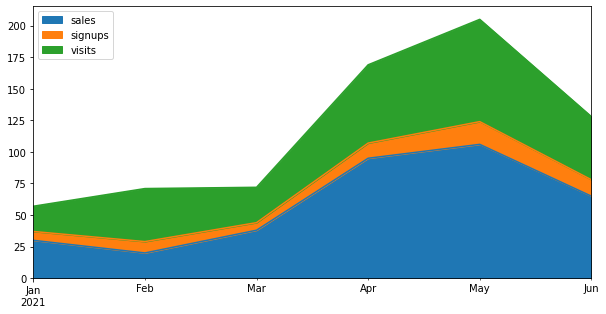

In [61]:
ax = df.plot.area(figsize = (10, 5))

## df.plot.bar()方法
下面我们看一下如何通过一行代码来绘制柱状图

In [ ]:
df = pd.DataFrame({'label':['A', 'B', 'C', 'D'], 'values':[10, 30, 50, 70]})
df.to_markdown()

|    | label   |   values |
|---:|:--------|---------:|
|  0 | A       |       10 |
|  1 | B       |       30 |
|  2 | C       |       50 |
|  3 | D       |       70 |

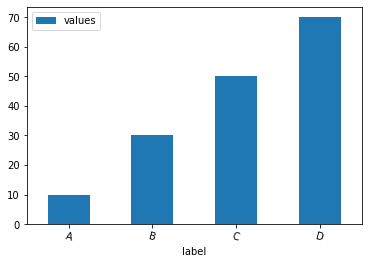

In [68]:
ax = df.plot.bar(x='label', 
                 y='values', 
                 rot=-15)

当然我们也可以根据不同的类别来绘制柱状图

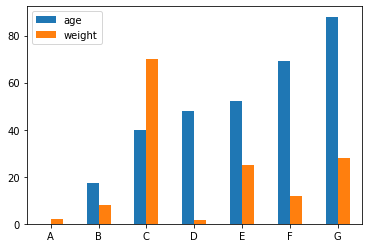

In [69]:
age = [0.1, 17.5, 40, 48, 52, 69, 88]
weight = [2, 8, 70, 1.5, 25, 12, 28]
index = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df = pd.DataFrame({'age': age, 
                   'weight': weight}, 
                   index=index)

ax = df.plot.bar(rot=0)

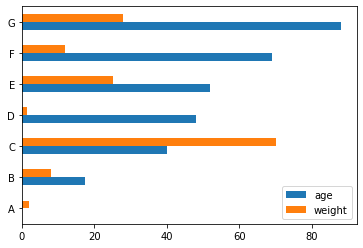

In [70]:
ax = df.plot.barh()

## df.plot.box()方法
我们来看一下箱型图的具体的绘制，通过pandas一行代码来实现


In [ ]:
data = np.random.randn(25, 3)
df = pd.DataFrame(data, columns=list('ABC'))
df

|    |         A |          B |          C |
|---:|----------:|-----------:|-----------:|
|  0 | -1.59132  |  1.47926   |  1.16891   |
|  1 | -0.649097 |  0.0501129 | -0.81485   |
|  2 |  1.31677  |  1.00035   |  0.0662983 |
|  3 | -1.04484  |  0.445727  |  0.0140137 |
|  4 |  0.217317 | -0.692044  | -0.758549  |
|  5 | -0.566574 | -0.159038  |  0.781744  |
|  6 | -0.903068 |  1.50697   |  1.2605    |
|  7 |  1.38627  | -0.0539971 | -0.0619803 |
|  8 | -1.50639  | -0.187649  |  1.00115   |
|  9 | -1.84435  | -1.37282   |  0.905218  |
| 10 | -0.400618 |  0.503642  |  1.20152   |
| 11 | -0.164643 |  1.58712   | -0.0475168 |
| 12 |  1.99742  | -0.928291  |  0.502433  |
| 13 | -1.25877  |  2.0764    | -0.840626  |
| 14 | -0.293273 | -2.09935   | -0.152372  |
| 15 | -0.686338 |  0.798964  |  1.4551    |
| 16 |  0.407321 |  0.601732  |  0.456718  |
| 17 |  0.594827 | -1.8498    |  1.22704   |
| 18 | -0.345245 | -1.27973   | -0.0971918 |
| 19 |  1.91415  |  0.656389  | -1.15816   |
| 20 |  0.149819 |  1.10037   | -0.0785313 |
| 21 | -0.311471 | -1.10781   |  0.707936  |
| 22 |  0.614726 | -0.142359  | -1.23091   |
| 23 |  1.46869  |  1.27063   |  0.797499  |
| 24 | -1.02252  |  0.819603  | -0.220382  |

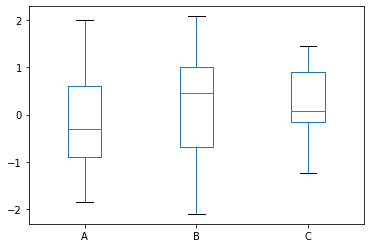

In [72]:
ax = df.plot.box()

## df.plot.pie()方法
接下来是饼图的绘制

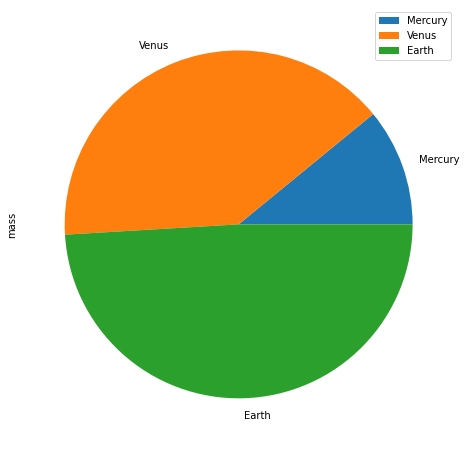

In [73]:
df = pd.DataFrame({'mass': [1.33, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])

plot = df.plot.pie(y='mass', figsize=(8, 8))

除此之外，还有折线图、直方图、散点图等等，步骤与方式都与上述的技巧有异曲同工之妙，大家感兴趣的可以自己另外去尝试。
